# Linear Regression II

Learning objectives:

Learn basic measures of quality of fit and variance explained:
- Mean Squared Errors
- R2
- Total Sum of Squares
- Residual Sum of Squares
- Explained Sum of Squares
- Linear Regression with multiple parameters


---

## Linear regression *recap*. 

In the last tutorial we went over linear regression using *numpy*'s *polyval* and *polyfit*.

Linear regression is used to model the relationship between a dependent variable and one or more independent variables. It assumes that there is a linear relationship between the independent variable(s) and the dependent variable. 

The goal of linear regression is to find the best-fit model that minimizes the difference between the predicted values and the actual values. Linear regression is important because it can help us to understand and predict the relationship between two or more variables. The term **linear** in Linear regression does not refer only to a line, but it applies to any polynomial! Linear here is referred to the parameters of the model and not the model *per se*!


In the previous tutorial we have learned how to fit models via linear regression by using `numpy`. Here we will learn a little bit more about fitting linear regression models. 


Here's a quick reminder example of fitting a linear model (in this case, a straight line) and computing the SSE.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random data
np.random.seed(123)
x = np.random.rand(50)
y = 2*x + 0.5*np.random.randn(50)

# Fit a linear regression model
coeffs = np.polyfit(x, y, 1)
y_pred = np.polyval(coeffs, x)

# Print the coefficients
print("Intercept:", coeffs[1])
print("Slope:", coeffs[0])

# Compute SSE
sse = sum((y-y_pred)**2)
print("SSE:", sse)

Intercept: 0.1358317884989734
Slope: 1.8342321813863358
SSE: 15.356374565056807


---

### <span style="color:blue">Exercise</span> 

- Generate your own data of shape `(10,)`.
- Fit a line and estimate the SSE
- Make a single figure and plot the data and line in different colors

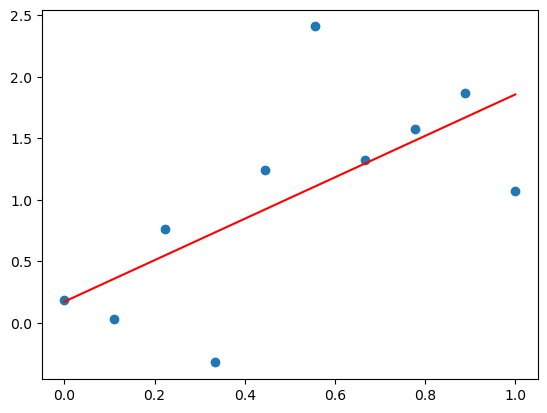

Slope: 1.68, Intercept: 0.17
SSE: 3.74


In [2]:
n = 10
x = np.linspace(0, 1, n)
y = 2*x + 0.5*np.random.randn(n)

# Fit a linear regression model
coeffs = np.polyfit(x, y, 1)
y_pred = np.polyval(coeffs, x)

# Compute SSE
sse = sum((y-y_pred)**2)

# plotting
plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

# Print the coefficients
print(f"Slope: {coeffs[0]:.2f}, Intercept: {coeffs[1]:.2f}")
print(f"SSE: {sse:.2f}")

---

## Linear regression using scikit-learn

The same operations of fitting and evaluating a regression model can also be implemented using a much more powerful set of tools implemented in the machine learning library `scikit-learn`. `scikit-learn` has module dedicated to linear regression models called `LinearRegression`. 

Let's import it:

In [3]:
from sklearn.linear_model import LinearRegression

We can implement the operations shown about using `polyval` and `polyfit` using `LinearRegression` using the code in the cell below. Note that the first step is to create a "LinearRegression" object, and then we use it's methods to do the actual fitting.

In [4]:
# Make the linear model object
model = LinearRegression()

# The fit method in LinearRegression only accepts predictors (x) as matrices. 
# So we need to reshape our array:
X = np.array(x).reshape(-1, 1)
# The -1 in the reshape method means that the length of that dimension is inferred

# Fit the model and get the predicted values
model.fit(X, y)
y_pred = model.predict(X)

# The coefficients can be extracted from the fit model as follows:
print("Intercept:", model.intercept_)
print("Slope:", model.coef_[0])

# Compute SSE
sse = sum((y-y_pred)**2)
print("SSE:", sse)

Intercept: 0.17267124093557906
Slope: 1.6848624600610473
SSE: 3.739433975894528


You might be wondering about the names of the `model` attributes `intercept_` and `coef_` – why name a variable with a trailing underscore? This is a convention in Python that is used when you want a variable name that might clash with a built in or pre-existing method or attribute. For example, if you really wanted to name a variable something like "dict" but if you actually used `dict`, your new variable would make you unable to use Python's `dict` function to make dictionaries! But if you use `dict_` instead, you have basically the name you wanted without ruining any of Python's functionality for the rest of the session.

In [5]:
X.shape

(10, 1)

Okay, however, besides the ideosyncracy of how `LinearRegression` accepts `x`, that was not very different. Instead of  using `polyfit` and `polyval`, we used `model.fit` and `model.predict` and the results (parameers and MSE) were identical. Good.

Now, `LinearRegression` might seem a little bit more complicated because, oh well, it is more complicated but also much more powerful! 

---

### <span style="color:blue">Exercise</span> 

- Generate a new data set of shape `(12,)`.
- Fit a line using `scikit-learn.linear_model` and estimate the SSE
- Make a single figure and plot, data, and line in different colors

---

## Quality of fit metrics

Linear regession is more generally referred to as *Ordinary Linear Square Regression* or *OLS* Regression. 

This is because the approach in regression is to minimise the sum of square errors (SSEs) between the data and the prediction of a model. The parameters of the model are adjusted so as to reduce the SSE and eventually minimize it.

We have seen before how to compute the SSE.

In [ ]:
print(sum((y-y_pred)**2))

In addition to SSE there are other measures of error important to learn about. 



When fitting OLS regression models we attempt to explain some proportion of the variability in the data with a model. More specifically, we try to explain some proportion fo the *variance* in the data using the model. So models are generally judged by the proportion of variance in the data that they can explain. 

The proportion of variance explained is a measure that describes the amount of variation in the dependent variable ($y$) that can be explained by the independent variable(s) ($x$) in a statistical model, such as a linear regression model.

When we fit a regression model, we are trying to find a line (or curve) that best represents the relationship between the independent variable(s) and the dependent variable. The amount of variation in the dependent variable that can be explained by the independent variable(s) is determined by the fit of the regression line to the data points.

In the context of linear regression, the total sum of squares ($TSS$) can be decomposed into two components: 
* the explained sum of squares ($ESS$) and 
* the residual sum of squares ($RSS$ or as called until now, the sum of squared error, $SSE$).

The explained sum of squares ($ESS$) is the sum of squares of the difference between the predicted values of the dependent variable and the mean of the dependent variable. It represents the amount of variability in the dependent variable that is explained by the independent variable(s) in the model.

$ESS = Σ(ŷi - ȳ)^2$

In [ ]:
ESS = sum((y_pred - np.mean(y))**2)
print(ESS)

The residual sum of squares ($RSS$, a.k.a., $SSE$) is the sum of squares of the difference between the predicted values of the dependent variable and the actual values of the dependent variable. It represents the amount of variability in the dependent variable that is not explained by the independent variable(s) in the model.

$RSS = Σ(yi - ŷi)^2$

In [ ]:
RSS = sum((y - y_pred)**2) #a.k.a. SSE
print(RSS)

The total sum of squares ($TSS$) is the sum of squares of the difference between the actual values of the dependent variable and the mean of the dependent variable. It represents the total amount of variability in the dependent variable.

$TSS = Σ(yi - ȳ)^2$

In [ ]:
TSS = sum((y - np.mean(y))**2)
print(TSS)

where $y_i$ is the actual value of the dependent variable, $ŷ_i$ is the predicted value of the dependent variable, and $ȳ$ is the mean of the dependent variable.

Note that $TSS = Σ(RSS + ESS)$

In [ ]:
print([TSS, RSS+ESS])

So far we have used only the SSE to copute the quality of fit of a model. There are several alternatives to RSS (a.k.a., SSE) that can be used to estimate the quality of fit of a model. A few commonly used ones are:

* Mean squared error (MSE): MSE is calculated as SSE divided by the number of degrees of freedom in the model. It is a measure of the average squared difference between the predicted values of the dependent variable and the actual values, and is often used as a measure of the overall goodness of fit of a model.

* Root mean squared error (RMSE): RMSE is the square root of MSE and is often used as a more interpretable measure of the overall goodness of fit of a model. RMSE has the same units as the dependent variable and is more easily interpretable than MSE.

* Mean absolute error (MAE): MAE is a measure of the average absolute difference between the predicted values of the dependent variable and the actual values. It is less sensitive to outliers than SSE and can be more robust in the presence of extreme values.

* Coefficient of determination (R²): R² is a measure of the proportion of variance in the dependent variable that is explained by the independent variables in the model. It ranges from 0 to 1, with higher values indicating a better fit between the model and the observed data. $R² = 1 - (SSE / TSS)$

Each one of these metrics is useful in different situations. Others also exist such as the K-L Divergence or Akaiake Information Criteria (AIK) or Baeysian Information Cirteria (BIC), we will cover some of these only in the future.


`scikit-learn` provides a convenient way to compute several goodness of fit  metrics to evaluate model performance. The module `sklearn.metrics` can be imported and submodules within it contain estimators of the goodness of fit of models: 

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
 
mae  = mean_absolute_error(y_true=y,y_pred=y_pred)
mse  = mean_squared_error(y_true=y,y_pred=y_pred) #squared=True
rmse = mean_squared_error(y_true=y,y_pred=y_pred,squared=False)
r2   = r2_score(y_true=y,y_pred=y_pred)
 
print("Mean Absolute Error (MAE):",mae)
print("Mean Squared Error (MSE):",mse)
print("Root-Mean Squared Error (RMSE):",rmse)
print("Coefficient of Determination (R²):",r2)

---

### <span style="color:blue">Exercise</span> 

- Generate a new data set of shape `(15,)`.
- Fit a line using `scikit-learn.linear_model` and estimate the SSE
- Use `scikit-learn.metrics` to estimate $R^2$

### Linear regression using scikit-learn (generalized linear regression)


So, far we have used `scikit-learn`'s `LinearRegression` uniquely to predict `n` `y` variables from `n` `x` variables.

Yet, in practice we can think situations where we might have multiple variables (say `n x m` variables) and we would like to use them to predict a single set of `n` variables.

For example imagine the case of `m` repeated measures of `n` values and wanting to predict corresponding `n` values of another variable.

`LinearRegression` allows us to set up this type of modelling. This is the reason why the `X` variables must alswyas be 2D and above we had to make sure it was a 2D array.

To work this example, we will use one of the datasets that come with `scikit learn`, the Boston Housing database:

In [ ]:
import pandas as pd
import seaborn as sns
#from sklearn.datasets import load_boston

from sklearn.datasets import fetch_california_housing
california_housing = fetch_california_housing()


To explore the dataset take a look at the Headers and Dictionary Keys. For example:

In [ ]:
print(california_housing.keys())

Where:

* `data`: contains the information for various houses
* `target`: prices of the house
* `target_names`: names of the house
* `feature_names`: names of the features
* `DESCR`: describes the dataset

The dataset contains a series of attributes or features (variables) measured along different dimensions. 

Take a look at:

In [ ]:
print(california_housing.DESCR)

The last variable `MEDV` (or median value) is our interest. It is the median value of homes in thousands of dollars.

The dataset contains `.data` and `.target`

In [ ]:
print(california_housing.data.shape)

In [ ]:
print(california_housing.target.shape)

For convenience we are going to create a smalled table of features:

In [ ]:
california = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
california.head()

We can take a look at the median house value:

In [ ]:
sns.displot(california_housing.target, bins=56)

We can explore the relationship between some of the features in the data and the target variable:

In [ ]:
x = california['MedInc']
y = california_housing.target
plt.scatter(x, y, marker='o')
plt.xlabel('Median Income')
plt.ylabel('Median House Values')

OK, it looks like there are features (like "RM") that have a relationship with the Median House Values. Let's try another feature:

In [ ]:
x = california['Population']
y = california_housing.target
plt.scatter(x, y, marker='o')
plt.xlabel('Population size')
plt.ylabel('Median House Values')

Also, a relationship. So, it looks like multiple features in the dataset have a relationship with the target variable (the median house value)

---

### <span style="color:blue">Exercise</span> 

- Explore the relationship between the target variable and two additional features of your choice. Make a plot.

---

It looks like multiple features have some relationship with the median house value in Boston. 

So, it makes sense to think that a linear combination of all these variables should predict in some way the median house value. This is a case in which `m` variables (features) predict alltogether a target variable.

We will use `LinearRegression` to experiment with fitting a linear model where `m` features predict a single variable.

First let's organize the data:

In [ ]:
# get dependent and independent variables from the data set
X = california_housing.data
y = california_housing.target

Second, let's fit the linear regression model. 

In [ ]:
housing_linear_regression = LinearRegression()
housing_linear_regression.fit(X, y)

Third, we will use the model to predict the data, the median house value:

In [ ]:
y_pred = housing_linear_regression.predict(X)

Finally, we will compare using a plot the predicted and measured Median House Value

In [ ]:
y_data_array = np.array(y).reshape(-1, 1) 
y_pred_array = np.array(y_pred).reshape(-1, 1)

In [ ]:
x = y_data_array
y = y_pred_array
plt.scatter(x, y, marker='o')
plt.xlabel('Predicted: House Values')
plt.ylabel('Measured: House Value')

---

### <span style="color:blue">Exercise</span> 

- Explain in your own words what you see in the previos Figure.
- Describe what the above experiment did
- How many features where in our model?
- How good was the quality of the fit (what was the R2 and MSE)?